<a href="https://colab.research.google.com/github/MrAttitude-droid/FastAI-models/blob/main/Mothflybat%20ver%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 93.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 91.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 117.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from fastai.vision.all import *

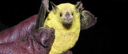

In [48]:
dest = ('../content/mothflybat/train/bat/bat001.jpg')
im = Image.open (dest)
im.to_thumb (128, 128)

In [49]:
insect_type = 'bat', 'butterfly', 'moth'
path = Path ('../content/mothflybat/train')
if not path.exists ():
    path.mkdir ()
    for o in insect_type:
        dest = (path/o)
        dest.mkdir (exist_ok = True)
        results = ('../content/mothflybat/train')

In [50]:
fns = get_image_files (path)
fns

(#119) [Path('../content/mothflybat/train/bat/bat004.jpg'),Path('../content/mothflybat/train/bat/bat022.jpg'),Path('../content/mothflybat/train/bat/bat029.jpg'),Path('../content/mothflybat/train/bat/bat011.jpg'),Path('../content/mothflybat/train/bat/bat023.jpg'),Path('../content/mothflybat/train/bat/bat018.jpg'),Path('../content/mothflybat/train/bat/bat006.jpg'),Path('../content/mothflybat/train/bat/bat027.jpg'),Path('../content/mothflybat/train/bat/bat015.jpg'),Path('../content/mothflybat/train/bat/bat021.jpg')...]

In [51]:
class DataLoaders (GetAttr):
    def __init__ (self, *loaders): self.loaders = loaders
    def __getitem__ (self, i): return self.loaders [i]
    train, valid = add_props (lambda i, self: self [i])

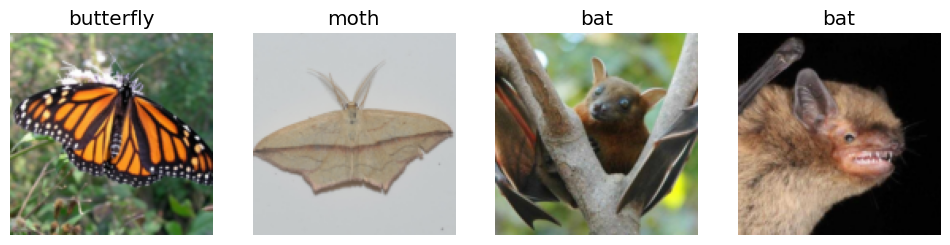

In [68]:
insects = DataBlock (blocks = (ImageBlock, CategoryBlock),
                  get_items = get_image_files,
                  splitter = RandomSplitter (valid_pct = 0.2, seed = 200),
                  get_y = parent_label, item_tfms = Resize (128))
dls = insects.dataloaders (path)
dls.valid.show_batch (max_n = 4, nrows = 1)

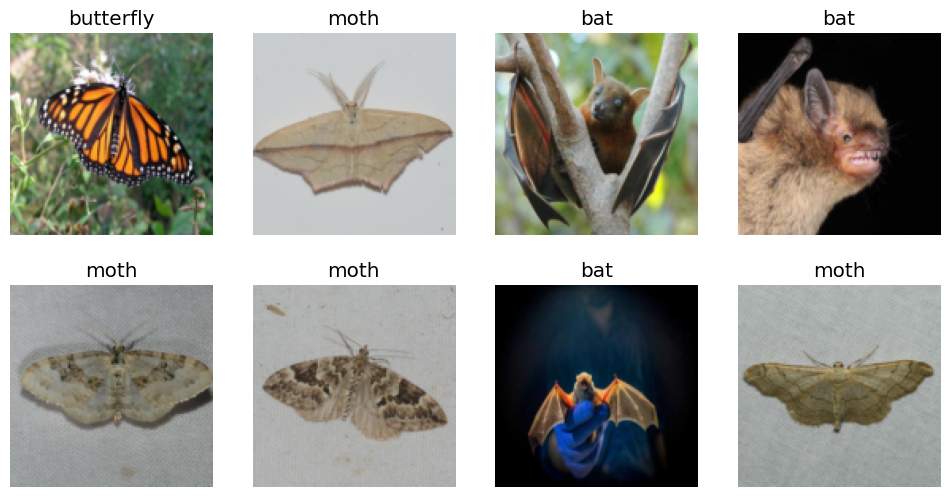

In [69]:
insects = insects.new (item_tfms = Resize (128, ResizeMethod.Squish))
dls = insects.dataloaders (path)
dls.valid.show_batch (max_n = 8, nrows = 2)

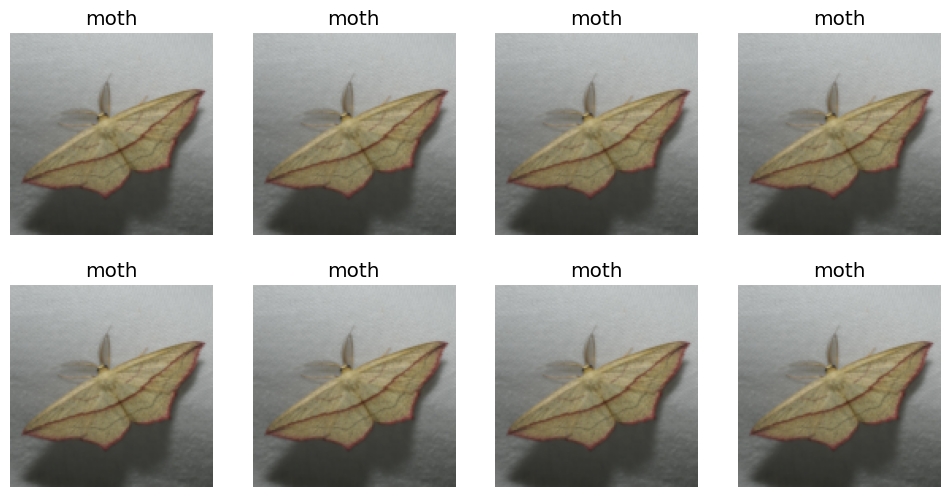

In [70]:
insects = insects.new (item_tfms = Resize (128), batch_tfms = aug_transforms)
dls = insects.dataloaders (path)
dls.train.show_batch (max_n = 8, nrows = 2, unique = True)

In [58]:
insects = insects.new (item_tfms = Resize (128, ResizeMethod.Squish),
                  batch_tfms = aug_transforms ())
dls = insects.dataloaders (path)
learn = vision_learner (dls, resnet18, metrics = error_rate)
learn.fine_tune (6)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 193MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.170403,1.603825,0.434783,00:06


epoch,train_loss,valid_loss,error_rate,time
0,1.504480,1.257855,0.434783,00:06
1,1.280107,0.766809,0.304348,00:08
2,1.038853,0.436906,0.173913,00:06
3,0.820668,0.219190,0.130435,00:07
4,0.682908,0.090388,0.043478,00:06
5,0.582610,0.047321,0.000000,00:07


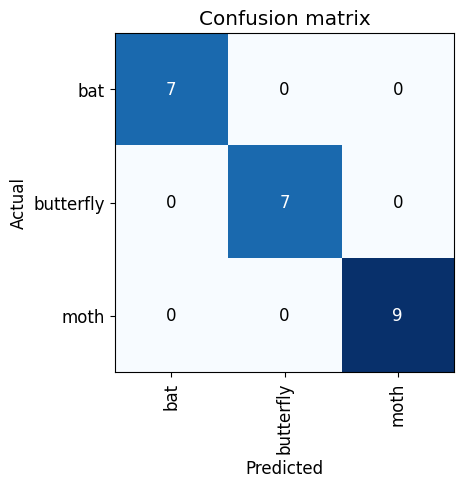

In [59]:
interp = ClassificationInterpretation.from_learner (learn)
interp.plot_confusion_matrix ()

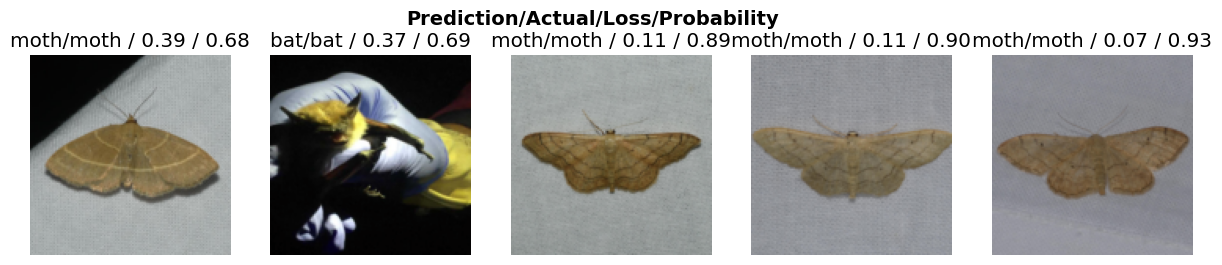

In [60]:
interp.plot_top_losses (5, nrows = 1)

In [67]:
learn.export ()
path = Path ()
path.ls (file_exts ='.pkl')
learn_inf = load_learner (path/'export.pkl')
learn_inf.predict ('../content/mothflybat/valid/moth/bube17juli2017_100_trisateles_emortualis.jpg')

('moth', tensor(2), tensor([2.5176e-04, 2.8027e-02, 9.7172e-01]))